<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-задачи" data-toc-modified-id="Описание-задачи-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание задачи</a></span></li><li><span><a href="#Загрузим-нужные-библиотеки" data-toc-modified-id="Загрузим-нужные-библиотеки-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузим нужные библиотеки</a></span></li><li><span><a href="#Рассмотрим-датасет-по-ближе" data-toc-modified-id="Рассмотрим-датасет-по-ближе-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Рассмотрим датасет по ближе</a></span></li><li><span><a href="#Добавим-новых-признаков" data-toc-modified-id="Добавим-новых-признаков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Добавим новых признаков</a></span></li><li><span><a href="#Помотрим-на-распределение-данных" data-toc-modified-id="Помотрим-на-распределение-данных-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Помотрим на распределение данных</a></span></li><li><span><a href="#Выделим-выборки" data-toc-modified-id="Выделим-выборки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выделим выборки</a></span></li><li><span><a href="#тестовая-выборка" data-toc-modified-id="тестовая-выборка-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>тестовая выборка</a></span></li><li><span><a href="#Выбор-модели" data-toc-modified-id="Выбор-модели-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Выбор модели</a></span></li><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Обучение модели</a></span></li><li><span><a href="#Подготовка-результатов" data-toc-modified-id="Подготовка-результатов-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Подготовка результатов</a></span></li></ul></div>

## Описание задачи

Цель — разработать модель, выявляющую отзывы, в которых
содержатся элементы культурного кода. Отзыв считается релевантным,
если он обладает ценностно-смысловым содержанием, и его автор
вписывает эти смыслы и ценности в свой жизненный и культурный контекст,
идентифицирует себя с героями, содержанием, исторической судьбой
народа.

**Описание данных:**

* `train_dataset_train.csv` — файл содержащий данные с отзывами для обучения
* `test_dataset_test.csv` — файл с отзыва, для предсказания
* `sample_solution.csv` — пример файла для отправки.

**Пояснение к столбцам:**
* `RecordNo` — уникальный идентификатор отзыва
* `Название книги` — название книги, на которую оставлен отзыв
* `Автор` — автор книги
* `Ссылка на литрес` — ссылка на книгу
* `Рейтинг` — общий рейтинг книги, рассчитанный на основе всех отзывов
* `Количество оценок` — суммарное число оценок книги в обзоре
* `Количество отзывов` — суммарное число письменных обзоров книги
* `Имя читателя` — имя пользователя, оставившего отзыв
* `Оценка книги читателем (из 5 баллов)` — оценка книги конкретным
пользователем
* `Отзыв` — текст отзыва
* `Лайки на отзыв` — количество положительных оценок отзыва,
оставленных другими пользователями
* `Дислайки на отзыв` — количество отрицательных оценок отзыва,
оставленных другими пользователями


**Предсказываемые значения:**
* `Релевантность` — характеристика, отражающая степень соответствия контента теме исследования: Нерелевантно - 0, Релевантно - 1;
* `Ценности` — наличие необходимых ценностей в тексте: Нерелевантно - 0, Релевантно - 1;
* `Таксономия релевантные` — наличие в тексте отзыва слов, словосочетаний, связей между словами из словаря синонимических рядов каждой категории, обозначающих духовно-нравственную ценность: не определено - 0, определено - 1;
* `Таксономия нерелевантные` — наличие в тексте отзыва слов, словосочетаний, связей между словами из словаря синонимических рядов каждой категории, обозначающих духовно-нравственную ценность, не подходящую к теме исследования: не определено - 0, определено - 1;
* `Длина отзыва` — наличие у отзыва оптимального числа слов: не определено - 0, определено - 1.

## Загрузим нужные библиотеки

In [1]:
#!pip install catboost

In [2]:
#!pip install pymystem3

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
import time
import nltk

from catboost import CatBoostClassifier
from pymystem3 import Mystem
from nltk.corpus import stopwords as nltk_stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import make_scorer, recall_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [4]:
df_train = pd.read_csv("train_dataset_train.csv")

In [5]:
df_test = pd.read_csv("test_dataset_test.csv")

## Рассмотрим датасет по ближе

In [6]:
df_train.head()

,RecordNo,Название книги,Автор,Ссылка на литрес,Рейтинг,Количество оценок,Количество отзывов,Имя читателя,Оценка книги читателем (из 5 баллов),Отзыв,Лайки на отзыв,Дислайки на отзыв,Релевантность,Таксономия релевантные,Таксономия не релевантные,Длина отзыва,Ценности
0,6145,Зулейха открывает глаза,Гузель Яхина,https://www.litres.ru/guzel-yahina/zuleyha-otk...,4.7,3922,408,Айгуль Ляпина,5.0,Рекомендую книгу в прочтению/прослушиванию. Ес...,0,3,0,0,0,0,0
1,7006,Зулейха открывает глаза,Гузель Яхина,https://www.litres.ru/guzel-yahina/zuleyha-otk...,4.6,24719,2103,Olga T,5.0,"Удивительно, что сейчас возникает ТАКАЯ литера...",0,1,0,0,0,0,1
2,1124,Дети мои,Гузель Яхина,https://www.litres.ru/guzel-yahina/deti-moi/,4.4,8032,702,Кирилл Чириков,5.0,"Душевно, жизненно, чувственно, проникновенно!!...",0,0,0,1,0,0,1
3,4716,ПОСТ,Дмитрий Глуховский,https://www.litres.ru/dmitriy-gluhovskiy/post/,3.9,430,48,Kimetov Oleg,5.0,Очень понравилось. Причем понравилось больше «...,2,7,0,1,0,0,0
4,2946,ПОСТ,Дмитрий Глуховский,https://www.litres.ru/dmitriy-gluhovskiy/post-...,4.4,832,113,Сергей Никитин,5.0,Круто. Автор и он же чтец – гений. Прослушал н...,1,0,0,0,0,0,0


In [7]:
df_train.shape

(4839, 17)

In [8]:
df_train.nunique()

RecordNo                                4839
Название книги                           103
Автор                                     59
Ссылка на литрес                         144
Рейтинг                                   18
Количество оценок                        106
Количество отзывов                        57
Имя читателя                            4263
Оценка книги читателем (из 5 баллов)       5
Отзыв                                   4826
Лайки на отзыв                            98
Дислайки на отзыв                         47
Релевантность                              2
Таксономия релевантные                     2
Таксономия не релевантные                  2
Длина отзыва                               2
Ценности                                   2
dtype: int64

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4839 entries, 0 to 4838
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   RecordNo                              4839 non-null   int64  
 1   Название книги                        4839 non-null   object 
 2   Автор                                 4839 non-null   object 
 3   Ссылка на литрес                      4839 non-null   object 
 4   Рейтинг                               4839 non-null   float64
 5   Количество оценок                     4839 non-null   int64  
 6   Количество отзывов                    4839 non-null   int64  
 7   Имя читателя                          4839 non-null   object 
 8   Оценка книги читателем (из 5 баллов)  4070 non-null   float64
 9   Отзыв                                 4839 non-null   object 
 10  Лайки на отзыв                        4839 non-null   int64  
 11  Дислайки на отзыв

## Добавим новых признаков

In [10]:
def lemmatize(df):
    comments_new = []
    m = Mystem()
    for comment in df:
        clear_text = re.sub(r'[^а-яА-ЯёЁ]',' ', comment)
        clear_text = ''.join(clear_text)
        clear_text = ' '.join(m.lemmatize(clear_text))
        comments_new.append(clear_text)
    return comments_new

In [11]:
def num_words(df):
    num_words = []
    for i in range(0,df.shape[0]):
        num_words.append(len(str.split(df_train['clear_text'].values[i])))
    return num_words     

In [12]:
df_train['clear_text'] = lemmatize(df_train['Отзыв'])

In [13]:
df_train['num_words'] = num_words(df_train['clear_text'])

In [14]:
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

In [15]:
df_train['Автор'] = encoder.fit_transform(df_train['Автор'].to_numpy().reshape(-1, 1))

In [16]:
df_train['len_reviews'] = df_train['Отзыв'].map(len)

In [17]:
df_train.head()

,RecordNo,Название книги,Автор,Ссылка на литрес,Рейтинг,Количество оценок,Количество отзывов,Имя читателя,Оценка книги читателем (из 5 баллов),Отзыв,Лайки на отзыв,Дислайки на отзыв,Релевантность,Таксономия релевантные,Таксономия не релевантные,Длина отзыва,Ценности,clear_text,num_words,len_reviews
0,6145,Зулейха открывает глаза,23.0,https://www.litres.ru/guzel-yahina/zuleyha-otk...,4.7,3922,408,Айгуль Ляпина,5.0,Рекомендую книгу в прочтению/прослушиванию. Ес...,0,3,0,0,0,0,0,рекомендовать книга в прочтение прослу...,24,157
1,7006,Зулейха открывает глаза,23.0,https://www.litres.ru/guzel-yahina/zuleyha-otk...,4.6,24719,2103,Olga T,5.0,"Удивительно, что сейчас возникает ТАКАЯ литера...",0,1,0,0,0,0,1,удивительно что сейчас возникать тако...,40,283
2,1124,Дети мои,23.0,https://www.litres.ru/guzel-yahina/deti-moi/,4.4,8032,702,Кирилл Чириков,5.0,"Душевно, жизненно, чувственно, проникновенно!!...",0,0,0,1,0,0,1,душевно жизненно чувственно проникнов...,35,278
3,4716,ПОСТ,27.0,https://www.litres.ru/dmitriy-gluhovskiy/post/,3.9,430,48,Kimetov Oleg,5.0,Очень понравилось. Причем понравилось больше «...,2,7,0,1,0,0,0,очень понравиться причем понравиться ...,52,342
4,2946,ПОСТ,27.0,https://www.litres.ru/dmitriy-gluhovskiy/post-...,4.4,832,113,Сергей Никитин,5.0,Круто. Автор и он же чтец – гений. Прослушал н...,1,0,0,0,0,0,0,круто автор и он же чтец гений ...,27,177


## Помотрим на распределение данных

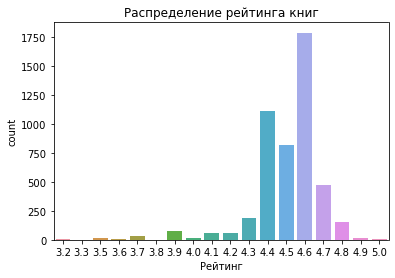

In [18]:
_ = sns.countplot(x = "Рейтинг" , data  = df_train).set_title('Распределение рейтинга книг')

Взглянем на несколько величин сразу

In [19]:
df_train.columns.values

array(['RecordNo', 'Название книги', 'Автор', 'Ссылка на литрес',
       'Рейтинг', 'Количество оценок', 'Количество отзывов',
       'Имя читателя', 'Оценка книги читателем (из 5 баллов)', 'Отзыв',
       'Лайки на отзыв', 'Дислайки на отзыв', 'Релевантность',
       'Таксономия релевантные', 'Таксономия не релевантные',
       'Длина отзыва', 'Ценности', 'clear_text', 'num_words',
       'len_reviews'], dtype=object)

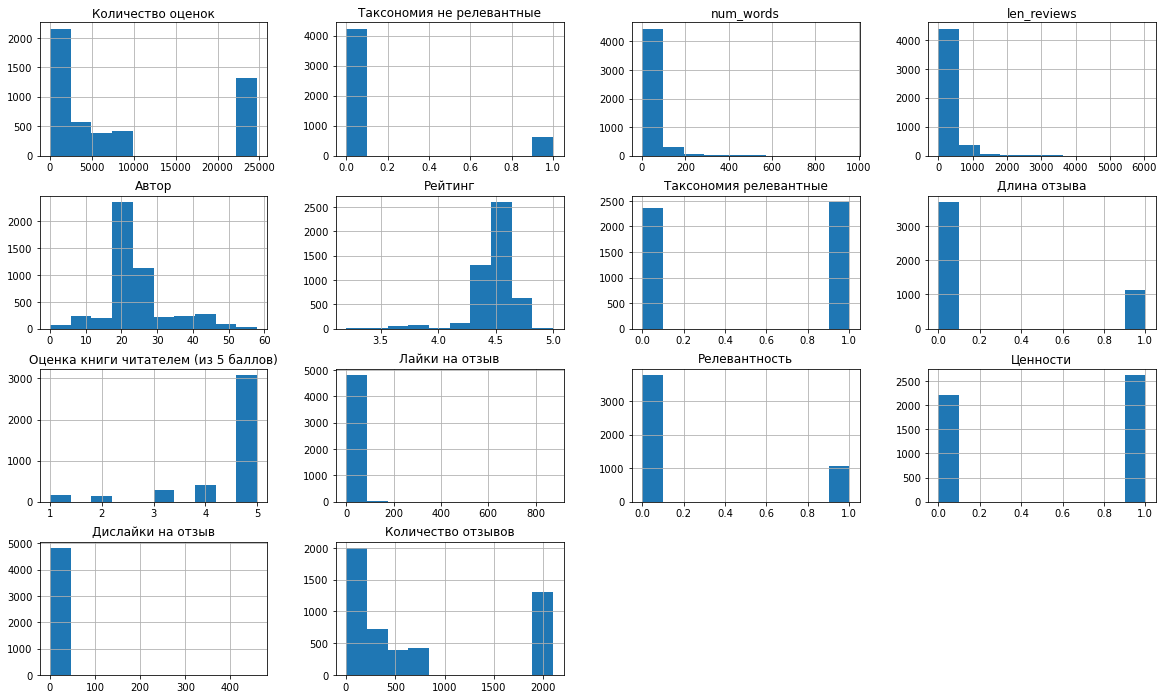

In [20]:
features = list(set(df_train.columns.values) - set(['RecordNo']))

_ = df_train[features].hist(figsize=(20,12))

In [21]:
df_train["Дислайки на отзыв"].value_counts()

0      2304
1      1487
2       320
3       275
4       147
5        79
6        51
7        31
8        28
10       14
13       12
9        11
11        9
12        8
16        7
19        5
14        4
35        4
17        4
15        4
28        3
21        2
18        2
32        2
108       2
22        2
24        2
29        1
117       1
235       1
181       1
459       1
56        1
69        1
37        1
256       1
147       1
317       1
57        1
66        1
91        1
53        1
33        1
20        1
41        1
40        1
23        1
Name: Дислайки на отзыв, dtype: int64

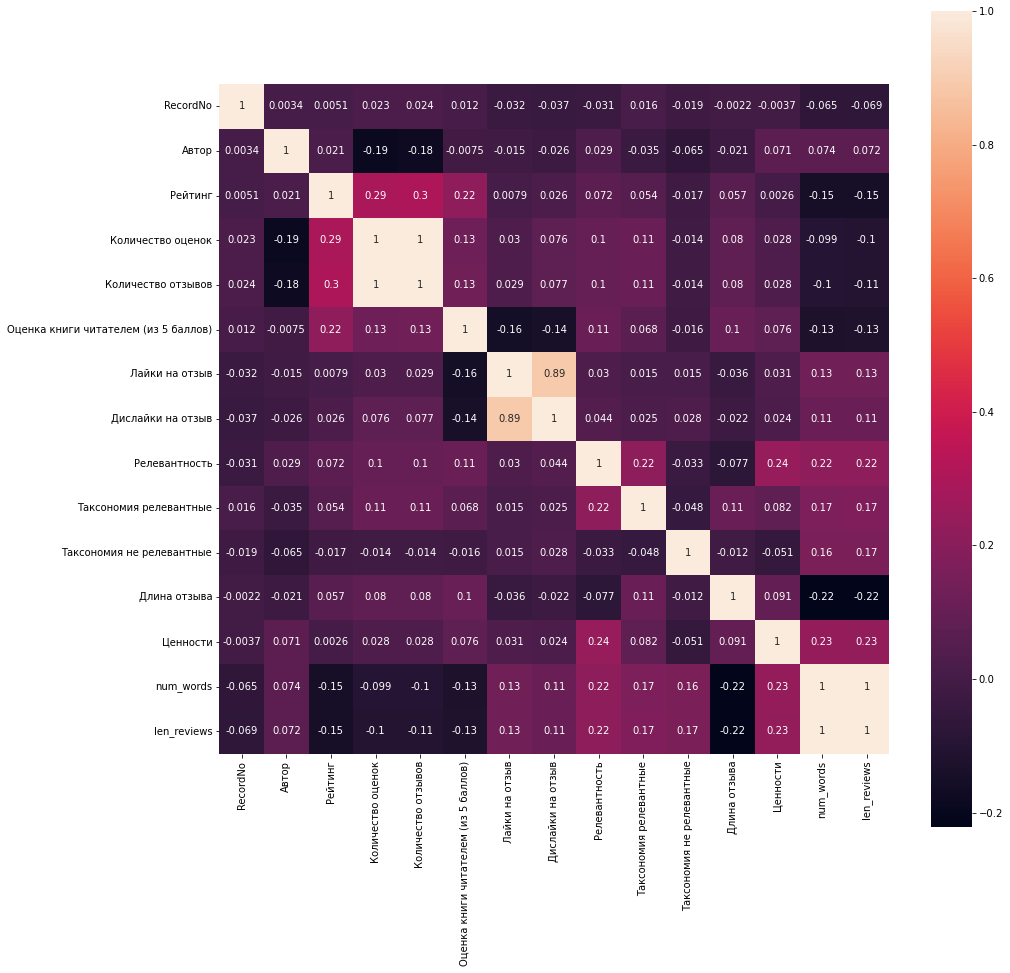

In [22]:
plt.rcParams['figure.figsize']=(15,15)

g = sns.heatmap(df_train.corr(), square = True, annot=True)

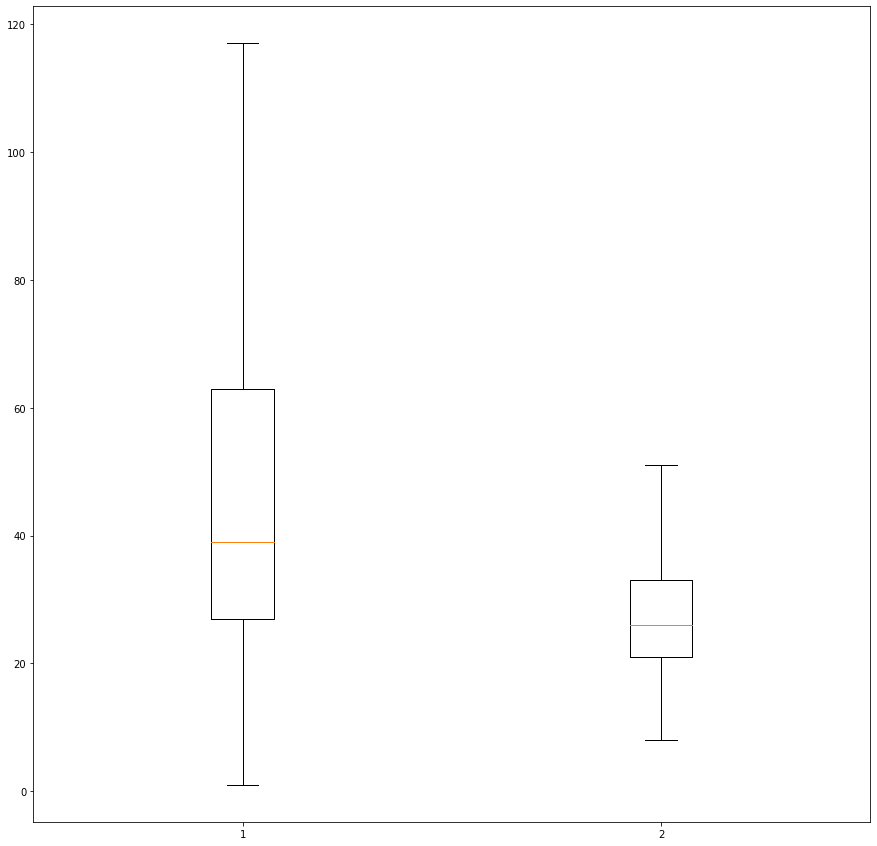

In [23]:
plt.boxplot([df_train[df_train['Длина отзыва'] == 0]['num_words'],\
          df_train[df_train['Длина отзыва'] == 1]['num_words']], showfliers=False);


In [24]:
df_train[df_train['Длина отзыва'] == 0]['num_words'].median()

39.0

In [25]:
df_train[df_train['Длина отзыва'] == 1]['num_words'].median()

26.0

## Выделим выборки

In [26]:
mass_label = ['Релевантность',
       'Таксономия релевантные', 'Таксономия не релевантные',
       'Длина отзыва', 'Ценности']

In [27]:
object_label = df_train.dtypes[df_train.dtypes == "object"].index.values
object_label = np.append(object_label,"RecordNo")
object_label

array(['Название книги', 'Ссылка на литрес', 'Имя читателя', 'Отзыв',
       'clear_text', 'RecordNo'], dtype=object)

In [28]:
X_train = df_train.drop(mass_label, axis = 1)
X_train = X_train.drop(object_label, axis = 1)

y_train_1 = df_train['Релевантность']
y_train_2 = df_train['Таксономия релевантные']
y_train_3 = df_train['Таксономия не релевантные']
y_train_4 = df_train['Длина отзыва']
y_train_5 = df_train['Ценности']

In [29]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4839 entries, 0 to 4838
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Автор                                 4839 non-null   float64
 1   Рейтинг                               4839 non-null   float64
 2   Количество оценок                     4839 non-null   int64  
 3   Количество отзывов                    4839 non-null   int64  
 4   Оценка книги читателем (из 5 баллов)  4070 non-null   float64
 5   Лайки на отзыв                        4839 non-null   int64  
 6   Дислайки на отзыв                     4839 non-null   int64  
 7   num_words                             4839 non-null   int64  
 8   len_reviews                           4839 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 340.4 KB


## тестовая выборка

In [30]:
df_test['clear_text'] = lemmatize(df_test['Отзыв'])

In [31]:
df_test['num_words'] = num_words(df_test['clear_text'])

In [32]:
df_test['Автор'] = encoder.transform(df_test['Автор'].to_numpy().reshape(-1, 1))

In [33]:
df_test['len_reviews'] = df_test['Отзыв'].map(len)

In [34]:
df_test.head()

,RecordNo,Название книги,Автор,Ссылка на литрес,Рейтинг,Количество оценок,Количество отзывов,Имя читателя,Оценка книги читателем (из 5 баллов),Отзыв,Лайки на отзыв,Дислайки на отзыв,clear_text,num_words,len_reviews
0,3366,Дети мои,23.0,https://www.litres.ru/guzel-yahina/deti-moi/,4.4,8032,702,Марина Ефимкина,5.0,"Настоящая глубокая книга, коих сейчас очень не...",2,0,настоящий глубокий книга кой сейчас ...,24,181
1,3952,Текст,27.0,https://www.litres.ru/dmitriy-gluhovskiy/tekst...,4.5,1923,246,alexvarp,5.0,Одна из лучших книг прочитанных за последние г...,1,0,один из хороший книга прочитывать за...,40,219
2,6852,Текст,27.0,https://www.litres.ru/dmitriy-gluhovskiy/tekst/,4.4,7276,622,fb_154207611938008,5.0,"Тот случай, когда невозможно пройти мимо, не о...",0,0,тот случай когда невозможно проходить...,35,390
3,4586,Зулейха открывает глаза,23.0,https://www.litres.ru/guzel-yahina/zuleyha-otk...,4.6,24719,2103,Мария Курочкина,NaN,"Очень не глубокая книга. Дочитала до конца, в ...",4,0,очень не глубокий книга дочитывать ...,52,280
4,4677,Зулейха открывает глаза,23.0,https://www.litres.ru/guzel-yahina/zuleyha-otk...,4.6,24719,2103,sahnovavera,NaN,"Очень понравилась. Читается легко, о непростых...",0,1,очень понравиться читаться легко о ...,27,136


In [35]:
df_test[df_test['Автор'] == -1]

,RecordNo,Название книги,Автор,Ссылка на литрес,Рейтинг,Количество оценок,Количество отзывов,Имя читателя,Оценка книги читателем (из 5 баллов),Отзыв,Лайки на отзыв,Дислайки на отзыв,clear_text,num_words,len_reviews
411,1159,Песнь тунгуса,-1.0,https://www.litres.ru/oleg-ermakov/pesn-tungusa/,4.3,10,2,397631570,5.0,"Если вижу значок премии «Ясная Поляна», значит...",5,0,если видеть значок премия ясный пол...,281,357
492,1703,Словарный запас,-1.0,https://www.litres.ru/iosif-davidovich-galperi...,5.0,2,1,Виктор Улин,5.0,Иосифа Гальперина я лично знаю без малого 35 л...,2,0,иосиф гальперин я лично знать без ...,19,1055
670,333,Песнь тунгуса,-1.0,https://www.litres.ru/oleg-ermakov/pesn-tungusa/,4.3,10,2,Анна,5.0,Было очень интересно читать о жизни людей и жи...,3,0,быть очень интересно читать о жизнь ...,39,234


In [36]:
X_test = df_test[X_train.columns]

In [37]:
X_test.head()

,Автор,Рейтинг,Количество оценок,Количество отзывов,Оценка книги читателем (из 5 баллов),Лайки на отзыв,Дислайки на отзыв,num_words,len_reviews
0,23.0,4.4,8032,702,5.0,2,0,24,181
1,27.0,4.5,1923,246,5.0,1,0,40,219
2,27.0,4.4,7276,622,5.0,0,0,35,390
3,23.0,4.6,24719,2103,NaN,4,0,52,280
4,23.0,4.6,24719,2103,NaN,0,1,27,136


In [38]:
nltk.download('stopwords')
stopwords = set(nltk_stopwords.words('russian'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/grigoriidubovoi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
count_tf_idf = TfidfVectorizer(stop_words=stopwords)
tf_idf_train = count_tf_idf.fit_transform(df_train['clear_text']) 
tf_idf_test = count_tf_idf.transform(df_test['clear_text'])

In [40]:
count_vect_unigram = CountVectorizer(stop_words=stopwords,ngram_range=(1,1)) 
bow_train_unigram = count_vect_unigram.fit_transform(df_train['clear_text']) 
bow_test_unigram = count_vect_unigram.transform(df_test['clear_text'])

In [41]:
#count_vect_bigram = CountVectorizer(stop_words=stopwords,ngram_range=(1,2)) 
#bow_train_bigram = count_vect_bigram.fit_transform(df_train['clear_text']) 
#bow_test_bigram = count_vect_bigram.transform(df_test['clear_text'])

## Выбор модели

In [42]:
recall = make_scorer(recall_score, average='macro')

In [43]:
def change_data(df_train,y,tf_idf_train,bow_train_unigram):
    recall = make_scorer(recall_score , average='macro')
    X_train = df_train[['Автор','Рейтинг','Количество оценок','Количество отзывов',\
                        'Оценка книги читателем (из 5 баллов)','Лайки на отзыв',\
                       'Дислайки на отзыв','len_reviews','num_words']]
    model=CatBoostClassifier(verbose=False, auto_class_weights='Balanced', random_state=314, loss_function='Logloss')
    res_table = cross_val_score(model, X_train, y, scoring=recall, cv=3)
    print('На табличных данных', np.mean(res_table))
    res = cross_val_score(model, tf_idf_train, y, scoring=recall, cv=3)
    print('TFIDF', np.mean(res))
    res_bow_uni = cross_val_score(model, bow_train_unigram, y, scoring=recall, cv=3)
    print('Униграммы', np.mean(res_bow_uni))
    #res_bow_bi = cross_val_score(model, bow_train_bigram, y, scoring=recall, cv=3)
    #print('Биграммы',res_bow_bi)

In [44]:
%%time
change_data(df_train,df_train['Релевантность'],tf_idf_train,bow_train_unigram)

На табличных данных 0.6620164851649037
TFIDF 0.7140807697796213
Униграммы 0.717827370073672
CPU times: user 11min 22s, sys: 8.74 s, total: 11min 31s
Wall time: 3min 58s


In [45]:
%%time
change_data(df_train,df_train['Таксономия релевантные'],tf_idf_train,bow_train_unigram)

На табличных данных 0.6056789750938393
TFIDF 0.988249869964798
Униграммы 0.9932920647370769
CPU times: user 11min 17s, sys: 8.45 s, total: 11min 25s
Wall time: 3min 57s


In [46]:
%%time
change_data(df_train,df_train['Таксономия не релевантные'],tf_idf_train,bow_train_unigram)

На табличных данных 0.6278781976304232
TFIDF 0.9734624309812615
Униграммы 0.9805707430763443
CPU times: user 11min 19s, sys: 8.95 s, total: 11min 28s
Wall time: 3min 59s


In [47]:
%%time
change_data(df_train,df_train['Длина отзыва'],tf_idf_train,bow_train_unigram)

На табличных данных 0.6744604296316005
TFIDF 0.6951213204512069
Униграммы 0.6943569320565177
CPU times: user 11min 30s, sys: 9.12 s, total: 11min 39s
Wall time: 4min 2s


In [48]:
%%time
change_data(df_train,df_train['Ценности'],tf_idf_train,bow_train_unigram)

На табличных данных 0.6098143566674695
TFIDF 0.9682817514045047
Униграммы 0.9755255129823626
CPU times: user 11min 35s, sys: 10.6 s, total: 11min 45s
Wall time: 4min 11s


In [ ]:
#Для Релевантности

# CatBoost

# param_grid = {
#    'learning_rate': [0.05,0.1,0.15], 
#    'iterations': [75,100,125,200],
#    'auto_class_weights': ['Balanced','SqrtBalanced', 'None'],
#    'max_depth': [2,3,4],
#}
# Best parameters: {'auto_class_weights': 'Balanced', 'iterations': 100, 
#                   'learning_rate': 0.1, 'max_depth': 3}
# Best recall = 0.6844
# CPU times: user 2min 48s, sys: 11 s, total: 2min 59s
# Wall time: 16.3 s


#Для длины отзыва

# CatBoost
# Best parameters: {'auto_class_weights': 'Balanced', 
#                   'iterations': 75, 'learning_rate': 0.05, 'max_depth': 3}
# Best recall = 0.6945
# CPU times: user 4min 4s, sys: 15.5 s, total: 4min 19s
# Wall time: 23.1 s 
# или
# LinearSVC
#svc_pipe = Pipeline([
#    ('scale', StandardScaler()),
#    ('cl', LinearSVC(random_state=rnd_st,
#                     tol=0.001,
#                     max_iter=1_000_000))
#])
#
#param_grid = {
#    'cl__C': [0.1,0.15,0.2,0.25,0.3],
#    'cl__multi_class': ['ovr', 'crammer_singer'],
#    'cl__class_weight': ['balanced', None], 
#    'cl__loss': ['hinge', 'squared_hinge']
#}
#Best parameters: {'cl__C': 0.2, 'cl__class_weight': 'balanced', 'cl__loss': 'squared_hinge', 'cl__multi_class': 'ovr'}
#Best recall = 0.6916
#CPU times: user 21.9 s, sys: 4.08 s, total: 26 s
#Wall time: 5.74 s



## Обучение модели

In [49]:
model1=CatBoostClassifier(verbose=False, random_state=314, loss_function='Logloss', auto_class_weights='Balanced')
model2=CatBoostClassifier(verbose=False, random_state=314, loss_function='Logloss', auto_class_weights='Balanced')
model3=CatBoostClassifier(verbose=False, random_state=314, loss_function='Logloss', auto_class_weights='Balanced')
model4=CatBoostClassifier(verbose=False, random_state=314, loss_function='Logloss', auto_class_weights='Balanced')
model5=CatBoostClassifier(verbose=False, random_state=314, loss_function='Logloss',auto_class_weights='Balanced')

In [50]:
model1.fit(bow_train_unigram,df_train['Релевантность'])

In [51]:
model2.fit(bow_train_unigram,df_train['Таксономия релевантные'])

In [52]:
model3.fit(bow_train_unigram,df_train['Таксономия не релевантные'])

In [53]:
model4.fit(tf_idf_train,df_train['Длина отзыва'])

In [54]:
model5.fit(bow_train_unigram,df_train['Ценности'])

In [55]:
y1 = model1.predict(bow_test_unigram)

In [56]:
y2 = model2.predict(bow_test_unigram)

In [57]:
y3 = model3.predict(bow_test_unigram)

In [58]:
y4 = model4.predict(tf_idf_test)

In [59]:
y5 = model5.predict(bow_test_unigram)

## Подготовка результатов

In [60]:
df = pd.DataFrame([y1,y2,y3,y4,y5] ,index=['Релевантность', 'Таксономия релевантные',
       'Таксономия не релевантные', 'Длина отзыва', 'Ценности'])
df = df.transpose()

In [61]:
df.head(5)

,Релевантность,Таксономия релевантные,Таксономия не релевантные,Длина отзыва,Ценности
0,1,0,0,1,1
1,0,1,0,0,0
2,0,0,0,1,1
3,0,0,0,0,1
4,1,1,0,1,0


In [62]:
df_solution = pd.read_csv('sample_solution.csv')

In [63]:
df_solution[['Релевантность', 'Таксономия релевантные',
       'Таксономия не релевантные', 'Длина отзыва', 'Ценности']] = df

In [64]:
df_solution.head()

,RecordNo,Релевантность,Таксономия релевантные,Таксономия не релевантные,Длина отзыва,Ценности
0,3366,1,0,0,1,1
1,3952,0,1,0,0,0
2,6852,0,0,0,1,1
3,4586,0,0,0,0,1
4,4677,1,1,0,1,0


In [65]:
df_solution.to_csv('vologda_03_10_solution.csv', index=False)